In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np

from IPython.display import display, HTML
display(HTML("<style>.jp-Cell { margin-left: -35% !important; margin-right: -35% !important; }</style>"))

In [2]:
def plot_and_show_statistics_(filename, bin_count):
    # CSV 파일 읽기
    data = pd.read_csv(filename)
    
    # 통계적 수치 계산
    allocation_rate_stats = data['Allocation Rate'].describe()
    utilization_rate_stats = data['Utilization Rate'].describe()
    
    print("Allocation Rate Statistics:")
    print(allocation_rate_stats)
    print("\nUtilization Rate Statistics:")
    print(utilization_rate_stats)
    
    # 그림 그릴 준비
    fig, axs = plt.subplots(2, 2, figsize=(20, 10))
    
    # Allocation Rate 히스토그램 및 KDE 그리기
    sns.histplot(data['Allocation Rate'], bins=bin_count, kde=True, ax=axs[0, 0], color='blue')
    axs[0, 0].set_title('Allocation Rate Distribution')
    
    # Utilization Rate 히스토그램 및 KDE 그리기
    sns.histplot(data['Utilization Rate'], bins=bin_count, kde=True, ax=axs[0, 1], color='green')
    axs[0, 1].set_title('Utilization Rate Distribution')
    
# 기존 하단 서브플롯 삭제
    for j in range(2):
        fig.delaxes(axs[1, j])
    
    # 새로운 하단 서브플롯 추가
    ax_combined = fig.add_subplot(212)  # 하단 전체를 차지하도록 설정
    
    x_allocation = np.arange(len(data))
    y_allocation = data['Allocation Rate']
    x_new_allocation = np.linspace(x_allocation.min(), x_allocation.max(), 300)
    spl_allocation = make_interp_spline(x_allocation, y_allocation, k=3)
    y_smooth_allocation = spl_allocation(x_new_allocation)
    
    x_utilization = np.arange(len(data))
    y_utilization = data['Utilization Rate']
    x_new_utilization = np.linspace(x_utilization.min(), x_utilization.max(), 300)
    spl_utilization = make_interp_spline(x_utilization, y_utilization, k=3)
    y_smooth_utilization = spl_utilization(x_new_utilization)
    
    ax_combined.plot(x_new_allocation, y_smooth_allocation, color='green', label='Allocation Rate')
    ax_combined.plot(x_new_utilization, y_smooth_utilization, color='black', label='Utilization Rate')
    
    ax_combined.set_title('Allocation Rate and Utilization Rate Over Time')
    ax_combined.set_xlabel('Index')
    ax_combined.set_ylabel('Rate')
    ax_combined.legend()

    
    base_filename = os.path.splitext(os.path.basename(filename))[0]
    png_filename = f"{base_filename}.png"
        # 전체 제목 설정
    fig.suptitle(base_filename, fontsize=16)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # 제목 공간 확보
    

    # 그래프를 png 파일로 저장
    plt.savefig(png_filename)
    plt.show()

Allocation Rate Statistics:
count    74251.000000
mean        74.967100
std         20.813703
min          1.190480
25%         66.666700
50%         80.952400
75%         89.285700
max        100.000000
Name: Allocation Rate, dtype: float64

Utilization Rate Statistics:
count    74251.000000
mean        41.979992
std         12.756462
min          1.162870
25%         35.742300
50%         44.801900
75%         50.806300
max         67.104900
Name: Utilization Rate, dtype: float64


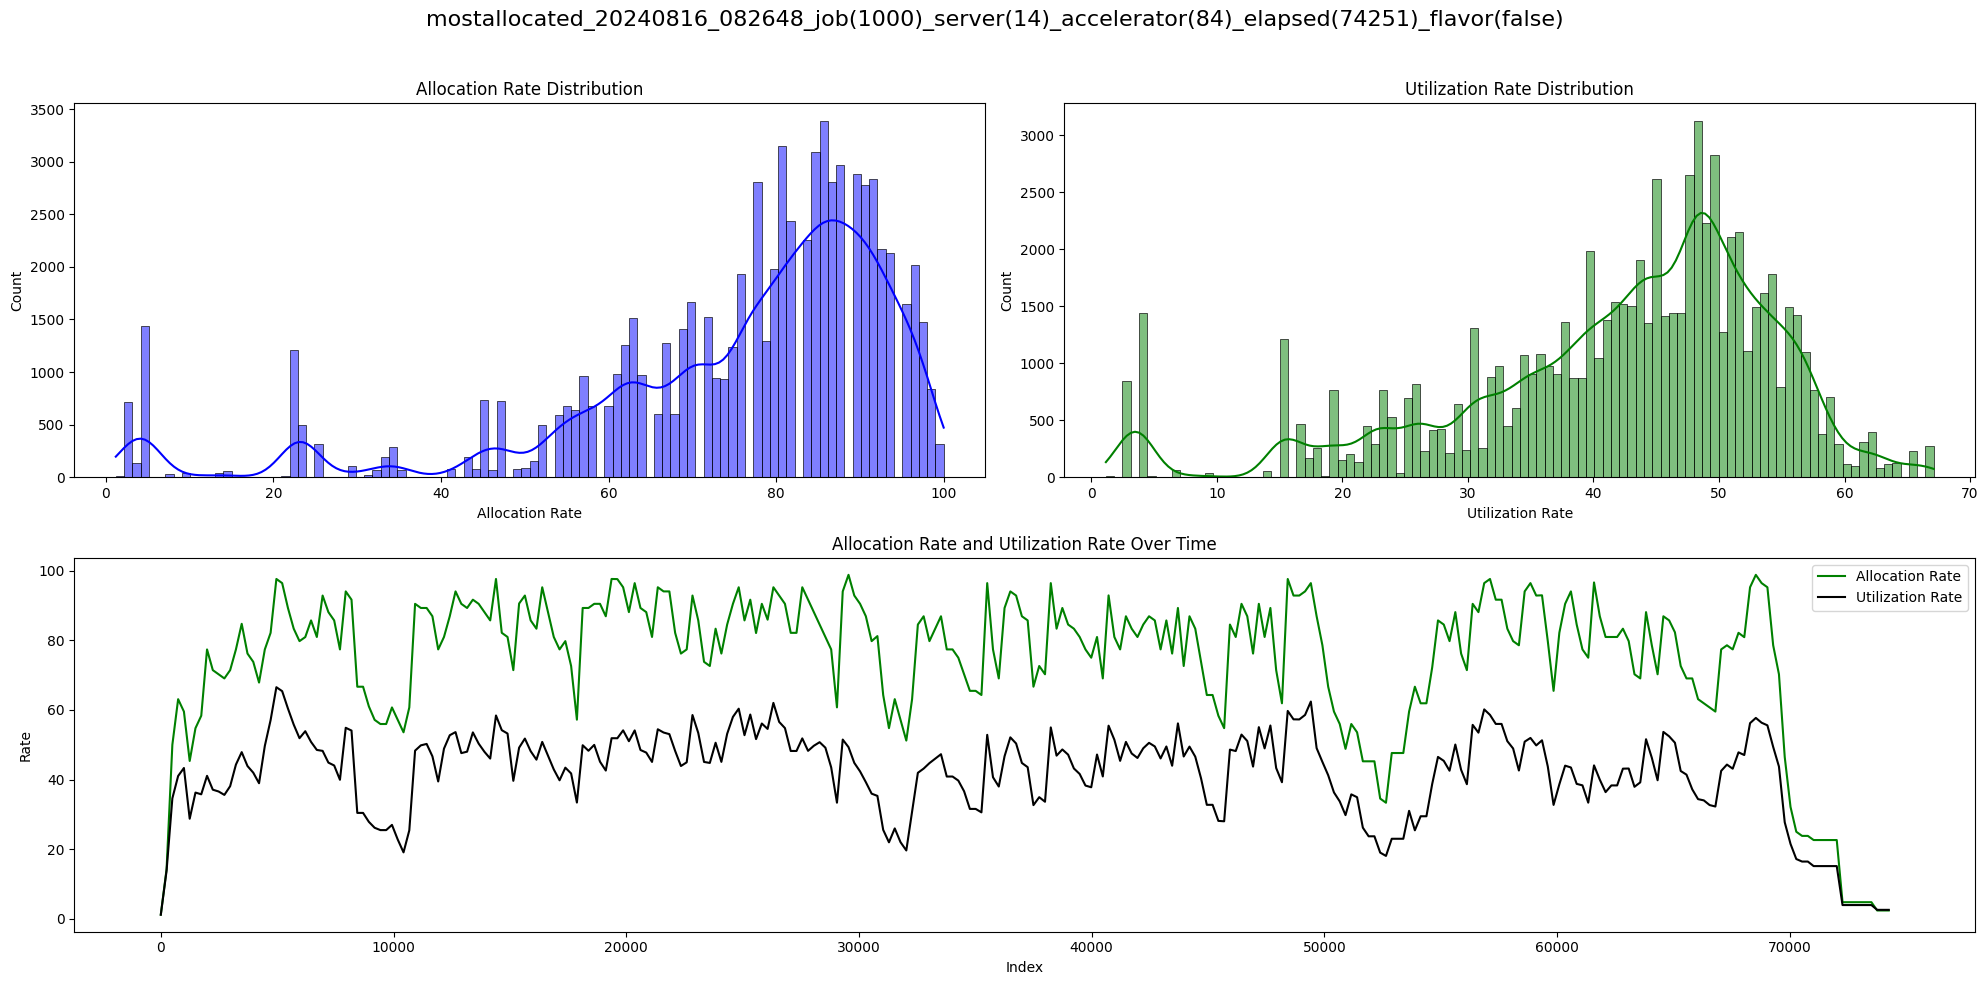

In [3]:
plot_and_show_statistics_("mostallocated_20240816_082648_job(1000)_server(14)_accelerator(84)_elapsed(74251)_flavor(false).result", 100)

Allocation Rate Statistics:
count    78555.000000
mean        70.859680
std         20.709507
min          1.190480
25%         60.714300
50%         73.809500
75%         85.714300
max        100.000000
Name: Allocation Rate, dtype: float64

Utilization Rate Statistics:
count    78555.000000
mean        37.816670
std         12.721462
min          0.581435
25%         30.290900
50%         38.871900
75%         47.169100
max         61.615900
Name: Utilization Rate, dtype: float64


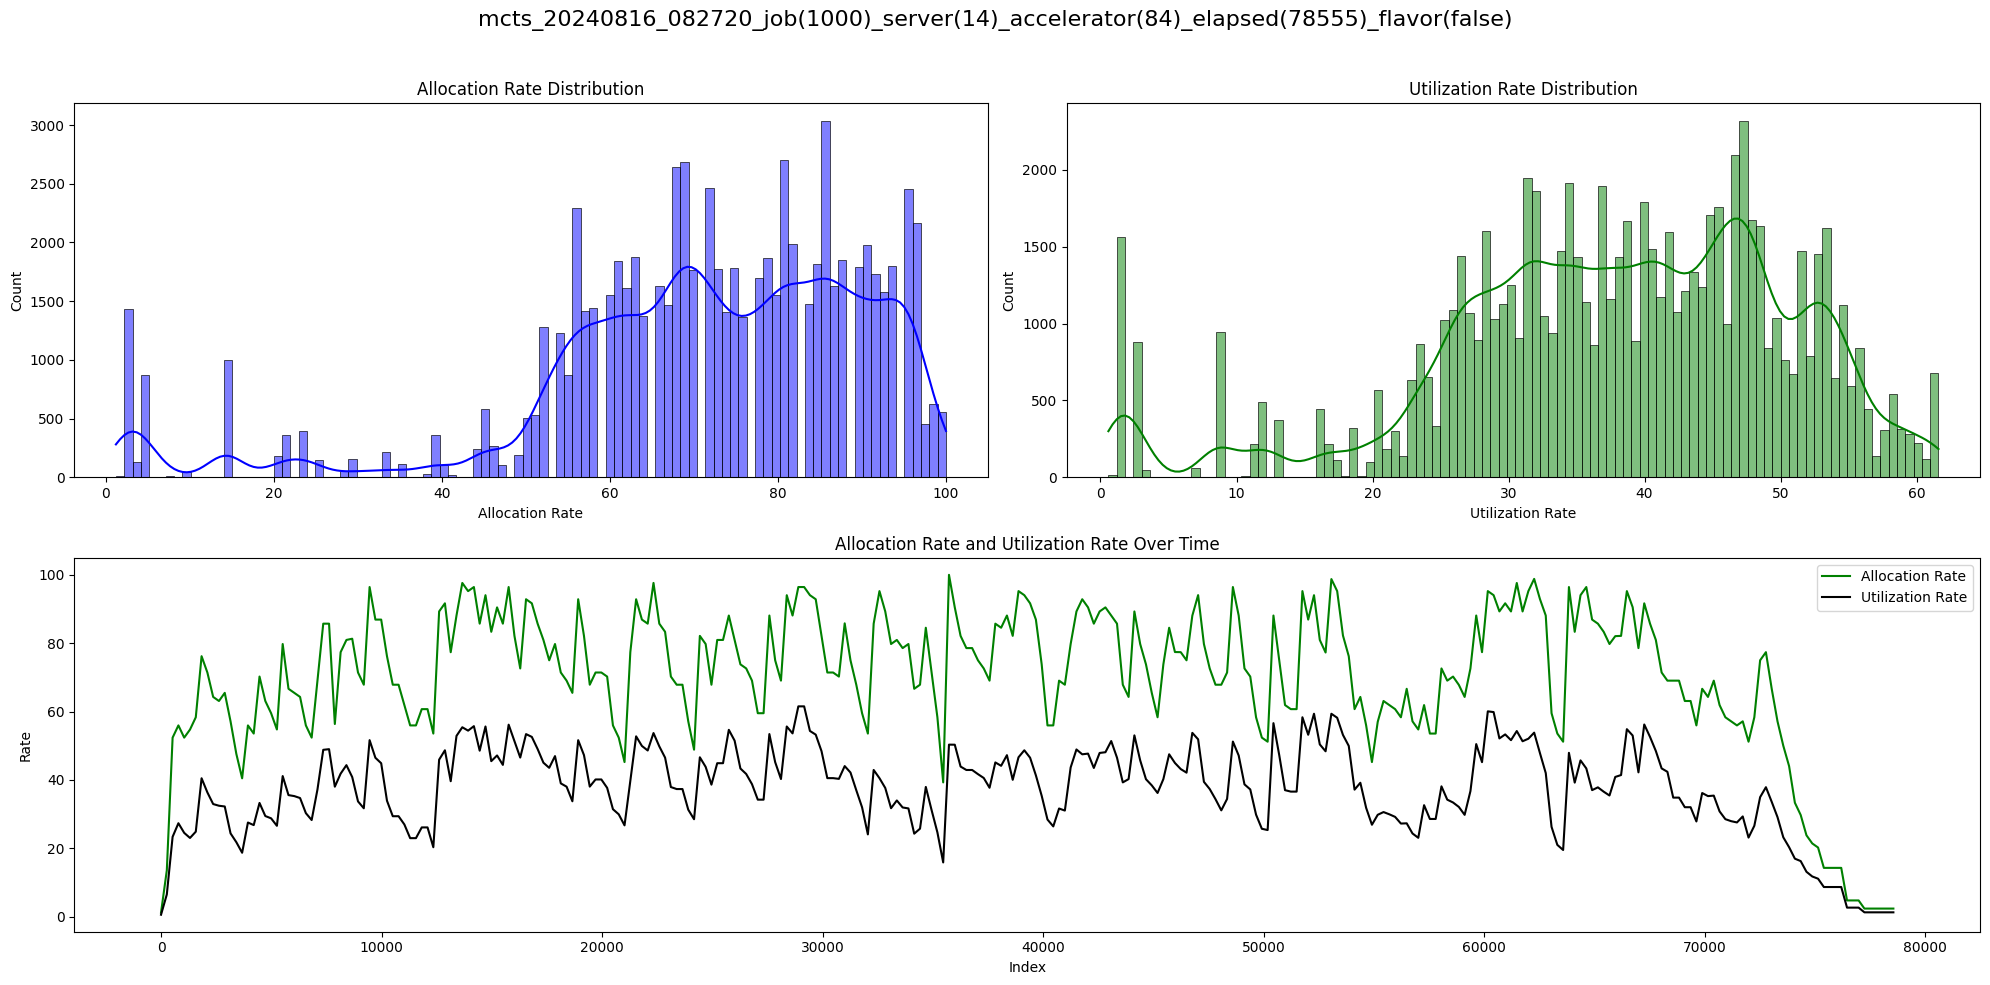

In [4]:
plot_and_show_statistics_("mcts_20240816_082720_job(1000)_server(14)_accelerator(84)_elapsed(78555)_flavor(false).result", 100)

Allocation Rate Statistics:
count    237991.000000
mean         67.974588
std          11.722333
min           5.952380
25%          60.714300
50%          67.857100
75%          75.000000
max          95.238100
Name: Allocation Rate, dtype: float64

Utilization Rate Statistics:
count    237991.000000
mean         28.786140
std           7.812148
min           1.674040
25%          23.603000
50%          28.026600
75%          33.277400
max          52.649100
Name: Utilization Rate, dtype: float64


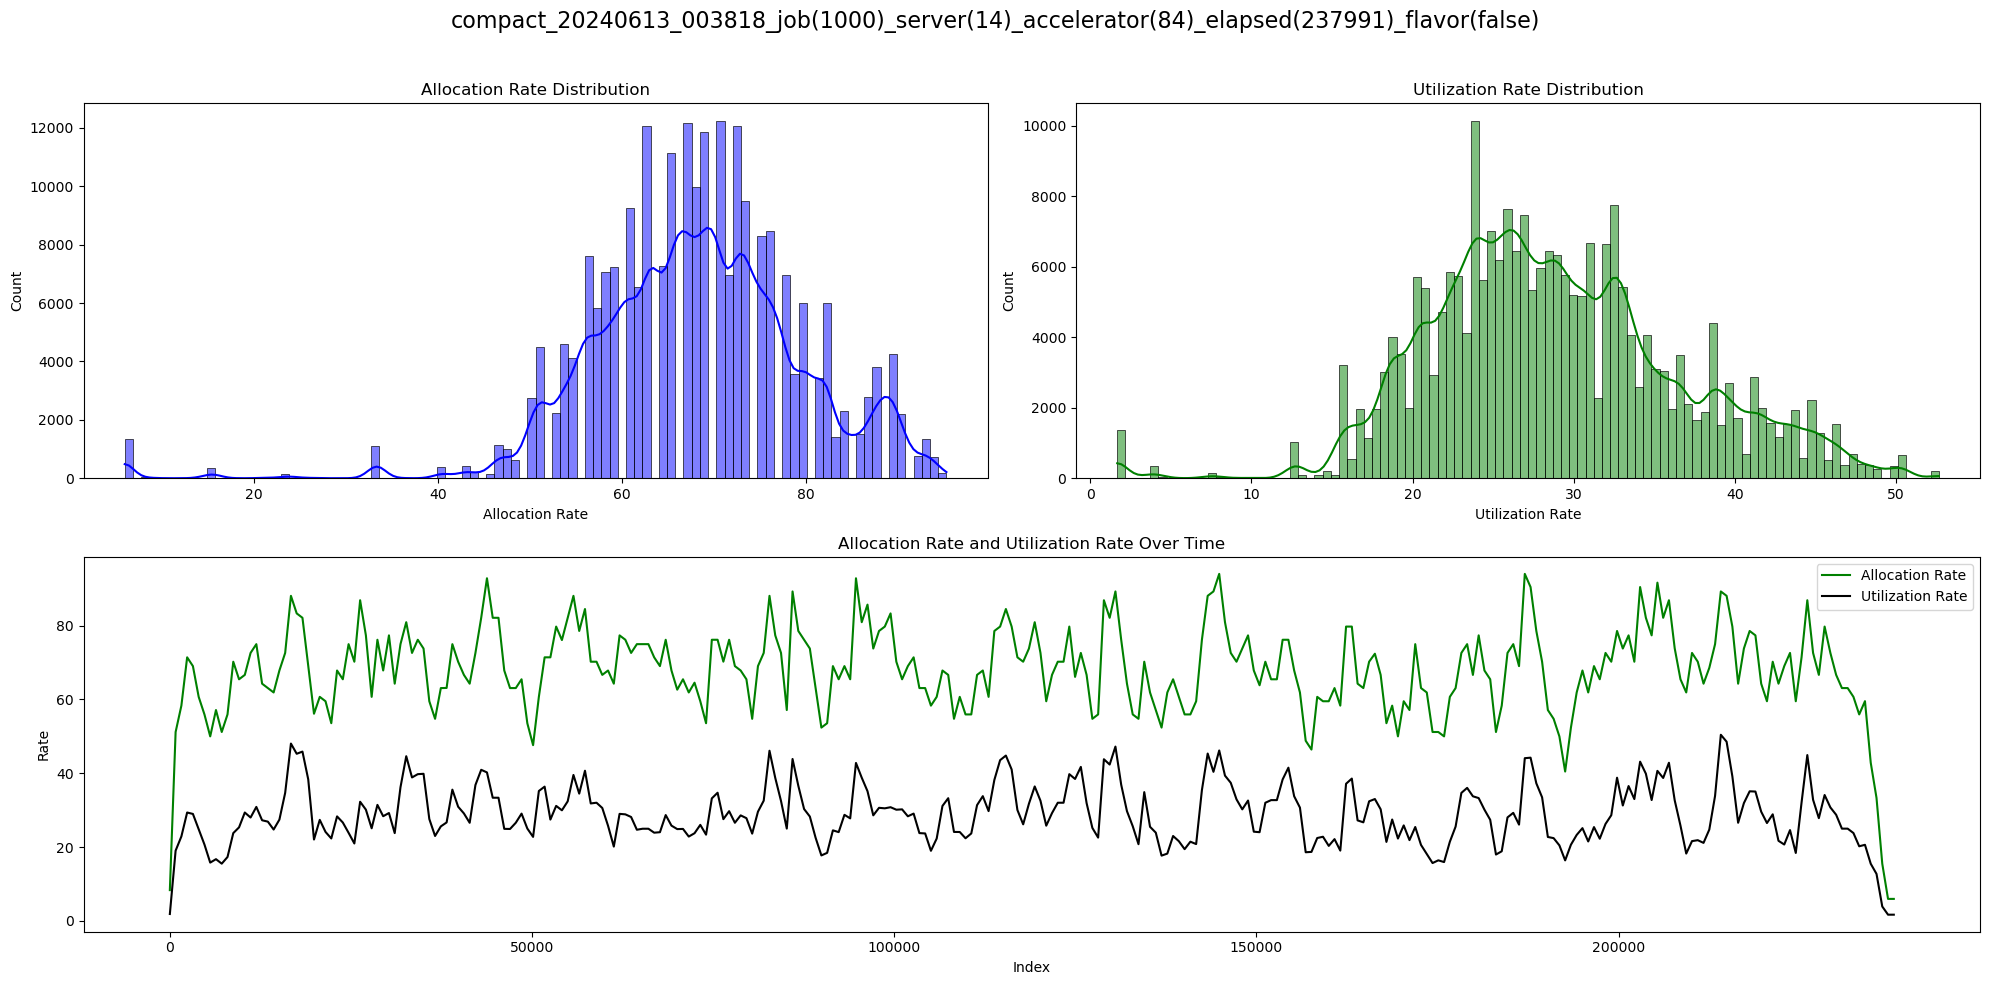

In [26]:
plot_and_show_statistics_("compact_20240613_003818_job(1000)_server(14)_accelerator(84)_elapsed(237991)_flavor(false).result", 100)

Allocation Rate Statistics:
count    251876.000000
mean         64.227398
std          13.409401
min           5.952380
25%          57.142900
50%          61.904800
75%          69.047600
max         100.000000
Name: Allocation Rate, dtype: float64

Utilization Rate Statistics:
count    251876.000000
mean         26.172906
std           8.685013
min           1.674040
25%          20.241600
50%          24.634400
75%          29.384500
max          55.129200
Name: Utilization Rate, dtype: float64


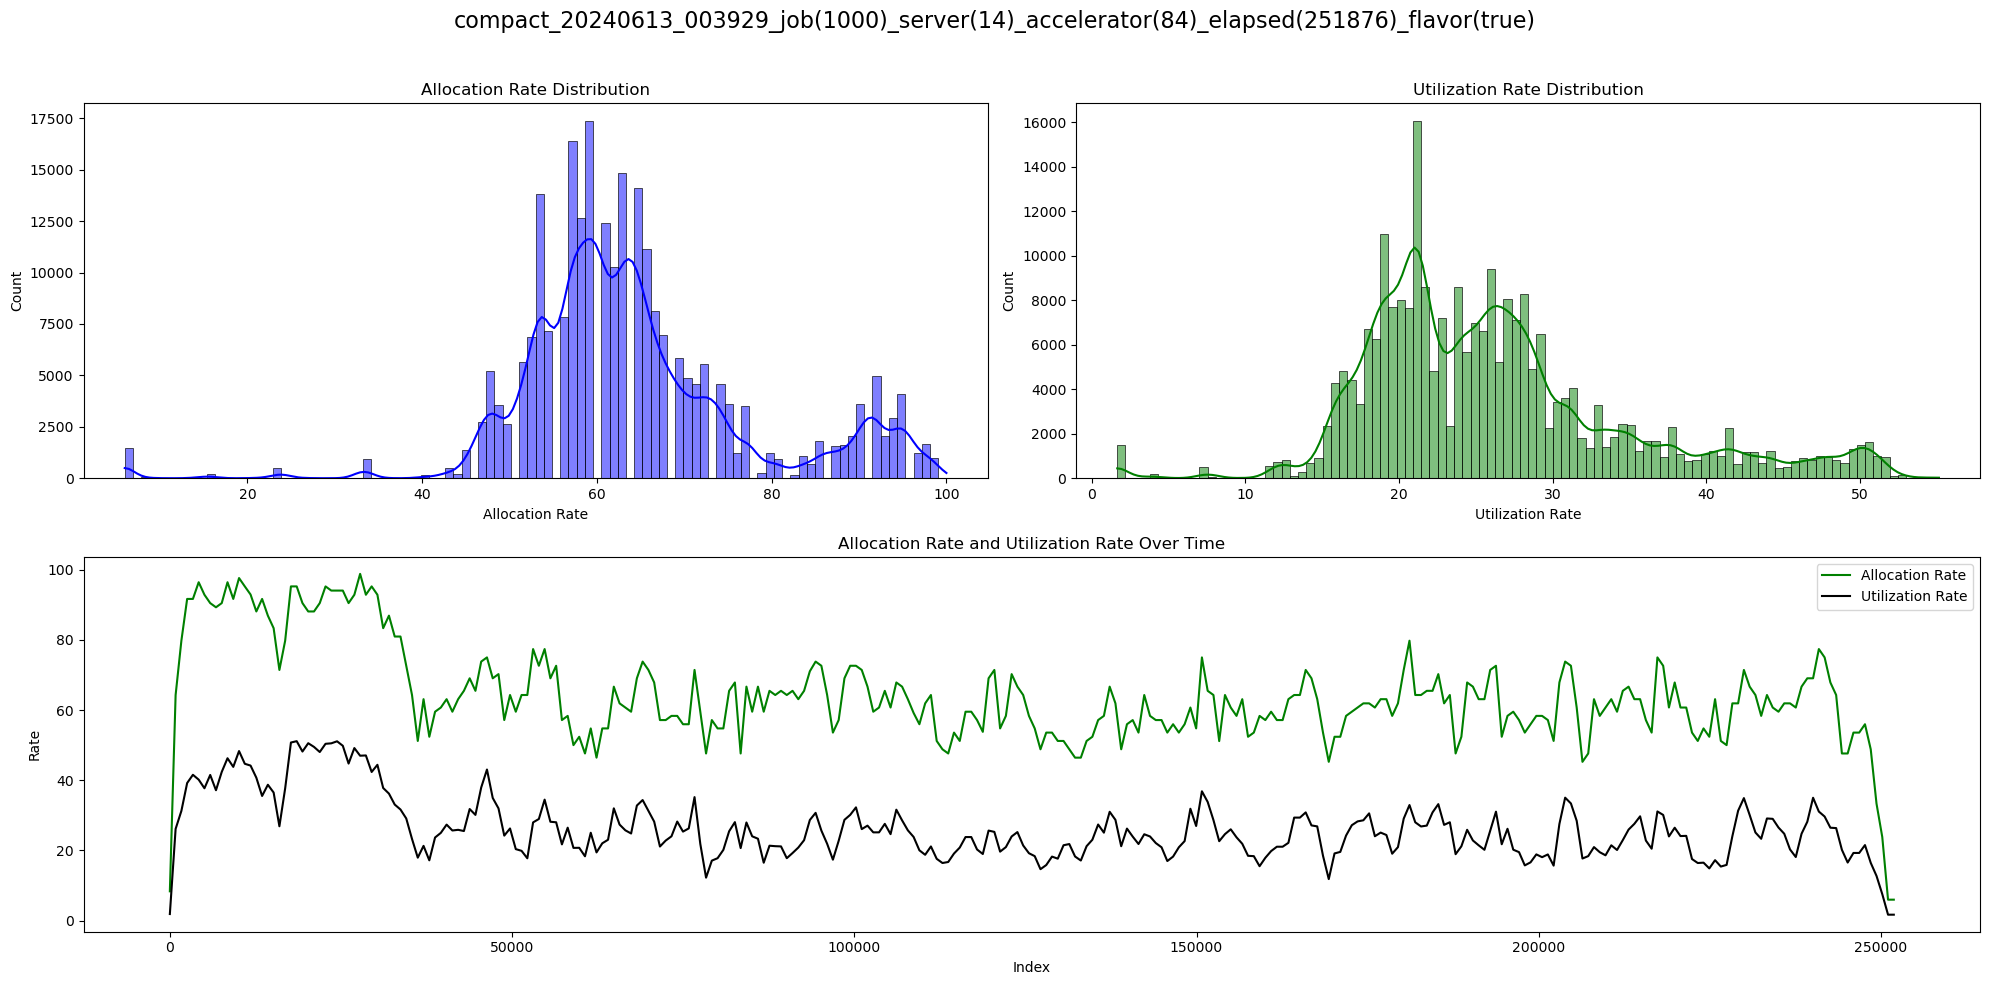

In [27]:
plot_and_show_statistics_("compact_20240613_003929_job(1000)_server(14)_accelerator(84)_elapsed(251876)_flavor(true).result", 100)

Allocation Rate Statistics:
count    231349.000000
mean         69.926130
std          11.403511
min           5.952380
25%          63.095200
50%          70.238100
75%          77.381000
max          95.238100
Name: Allocation Rate, dtype: float64

Utilization Rate Statistics:
count    231349.000000
mean         30.591491
std           7.911802
min           1.674040
25%          25.505600
50%          30.095300
75%          35.753300
max          53.162700
Name: Utilization Rate, dtype: float64


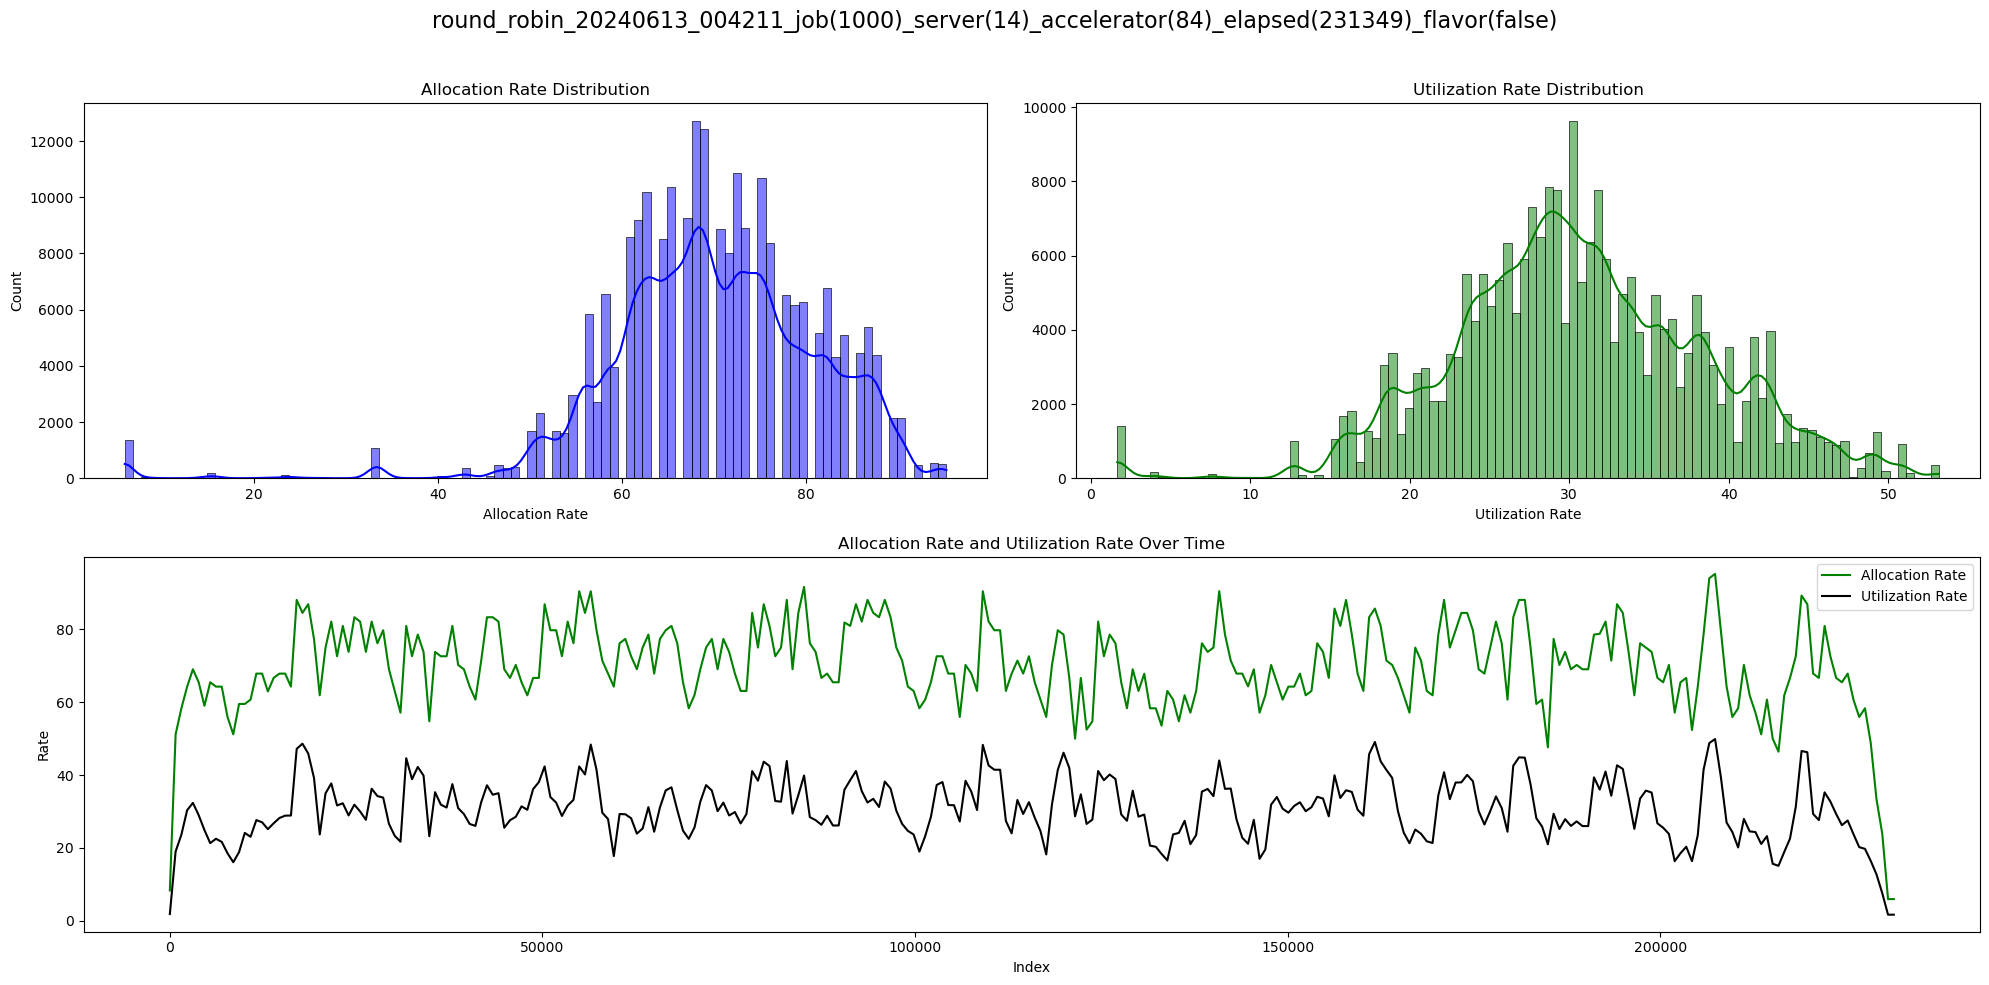

In [28]:
plot_and_show_statistics_("round_robin_20240613_004211_job(1000)_server(14)_accelerator(84)_elapsed(231349)_flavor(false).result", 100)

Allocation Rate Statistics:
count    243054.000000
mean         66.558630
std          13.624107
min           5.952380
25%          58.333300
50%          63.095200
75%          72.619000
max          97.619000
Name: Allocation Rate, dtype: float64

Utilization Rate Statistics:
count    243054.000000
mean         28.071335
std           8.710017
min           1.674040
25%          22.022000
50%          26.470900
75%          32.568600
max          55.162400
Name: Utilization Rate, dtype: float64


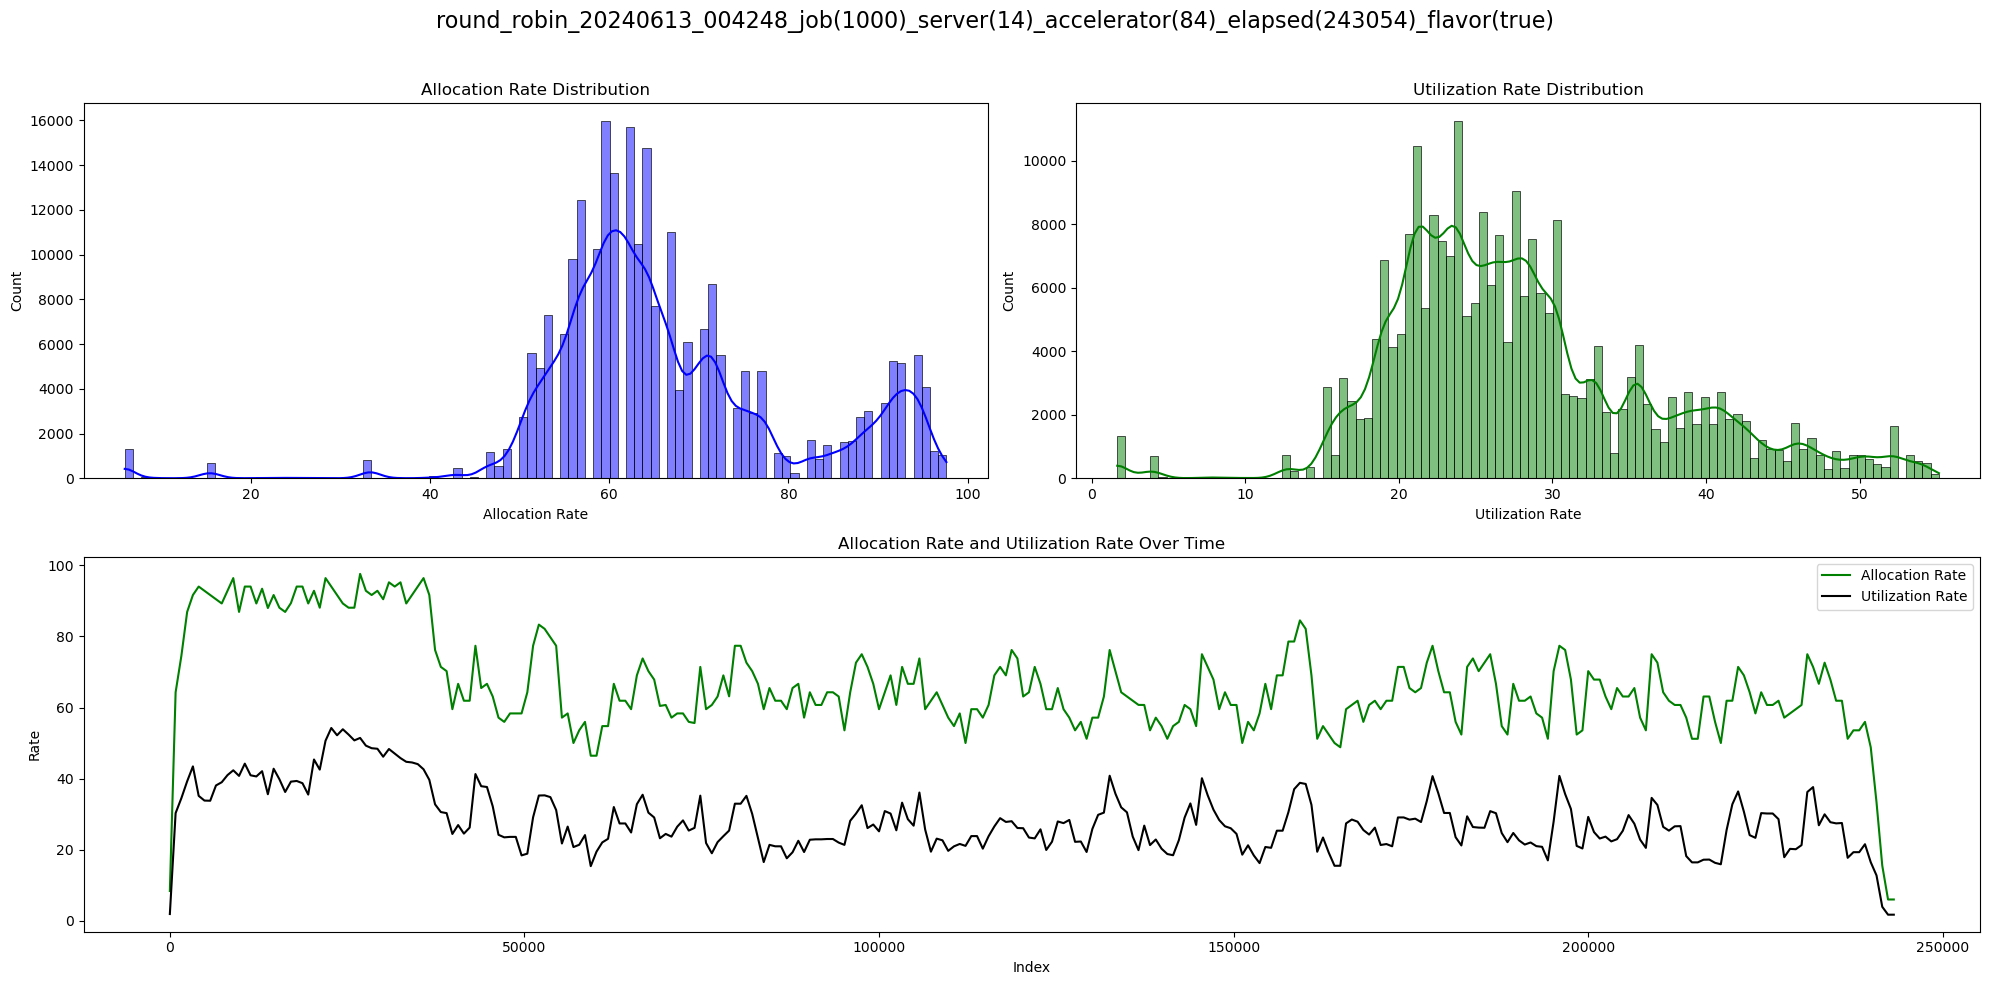

In [29]:
plot_and_show_statistics_("round_robin_20240613_004248_job(1000)_server(14)_accelerator(84)_elapsed(243054)_flavor(true).result", 100)

In [19]:
def plot_and_show_statistics(filename, bin_count):
    # CSV 파일 읽기
    data = pd.read_csv(filename)
    

    
    # 통계적 수치 계산
    allocation_rate_stats = data['Allocation Rate'].describe()
    utilization_rate_stats = data['Utilization Rate'].describe()
    
    print("Allocation Rate Statistics:")
    print(allocation_rate_stats)
    print("\nUtilization Rate Statistics:")
    print(utilization_rate_stats)
    
    # 그림 그릴 준비
    fig, axs = plt.subplots(1, 2, figsize=(20, 7))
    
    # Allocation Rate 히스토그램 및 KDE 그리기
    sns.histplot(data['Allocation Rate'], bins=bin_count, kde=True, ax=axs[0], color='blue')
    axs[0].set_title('Allocation Rate Distribution')
    
    # Utilization Rate 히스토그램 및 KDE 그리기
    sns.histplot(data['Utilization Rate'], bins=bin_count, kde=True, ax=axs[1], color='green')
    axs[1].set_title('Utilization Rate Distribution')
    

    base_filename = os.path.splitext(os.path.basename(filename))[0]
    png_filename = f"{base_filename}.png"
    # 그래프를 png 파일로 저장
    plt.savefig(png_filename)
    plt.show()